# Proyek Analisis Data: Bike Sharing
- Nama: Muhammad Ilham Pradipta
- Email: ilhampradipta68@gmail.com
- Id Dicoding: mihamp12

## Menentukan Pertanyaan Bisnis

- Berapa banyak jumlah pendaftar yang mendaftar berdasarkan musim ?
- Jam berapa peminjam meminjam sepeda dan jumlah peminjamnya berapa ?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv('https://raw.githubusercontent.com/ilhamfast/Dicoding_analisis-data/main/day.csv')
df_hour = pd.read_csv('https://raw.githubusercontent.com/ilhamfast/Dicoding_analisis-data/main/hour.csv')

### Assessing Data

In [3]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
df_hour.drop(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 
              'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], axis=1, inplace=True)

In [8]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   instant  17379 non-null  int64
 1   hr       17379 non-null  int64
dtypes: int64(2)
memory usage: 271.7 KB


In [9]:
df= pd.merge(left=df_day, right=df_hour, how='inner', left_on='instant', right_on='instant')

In [10]:
df['dteday']=pd.to_datetime(df['dteday'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  hr          731 non-null  

In [12]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,5
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,6
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,7
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,8
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,9


In [13]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

# Mengganti nilai dalam kolom 'season' menggunakan mapping
df['season'] = df['season'].map(season_mapping)

In [14]:
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4


In [15]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
hr            0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,instant,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,11.805746
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,6.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,12.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,18.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,23.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,6.859492


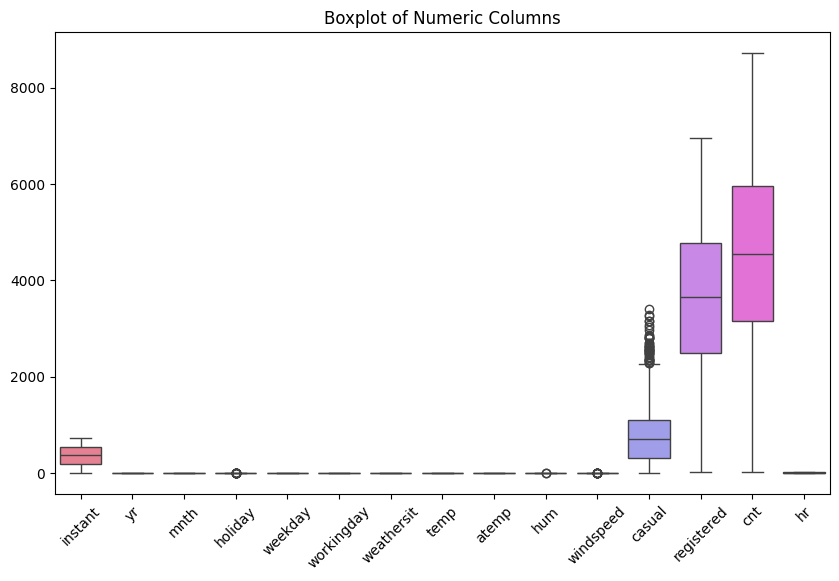

In [18]:
numeric_columns = df.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.boxplot(data=numeric_columns)
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

### Cleaning Data

In [19]:
q1 = df['casual'].quantile(0.25)
q3 = df['casual'].quantile(0.75)

IQR = q3 - q1

max = q3 + (1.5 * IQR)
min = q1 - (1.5 * IQR)

outlier = (df['casual'] > max).sum()
print(f'jumlah outlier : {outlier}')

jumlah outlier : 44


In [20]:
#Hapus outlier
df = df[(df['casual'] > min) & (df['casual'] < max)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     687 non-null    int64         
 1   dteday      687 non-null    datetime64[ns]
 2   season      687 non-null    object        
 3   yr          687 non-null    int64         
 4   mnth        687 non-null    int64         
 5   holiday     687 non-null    int64         
 6   weekday     687 non-null    int64         
 7   workingday  687 non-null    int64         
 8   weathersit  687 non-null    int64         
 9   temp        687 non-null    float64       
 10  atemp       687 non-null    float64       
 11  hum         687 non-null    float64       
 12  windspeed   687 non-null    float64       
 13  casual      687 non-null    int64         
 14  registered  687 non-null    int64         
 15  cnt         687 non-null    int64         
 16  hr          687 non-null    int

In [21]:
df.head(30)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4
5,6,2011-01-06,spring,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,5
6,7,2011-01-07,spring,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,6
7,8,2011-01-08,spring,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,7
8,9,2011-01-09,spring,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,8
9,10,2011-01-10,spring,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,9


## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
registered_season = df.groupby('season')['registered'].sum().reset_index()
registered_season

,season,registered
0,fall,766711
1,spring,406045
2,summer,629151
3,winter,677309


In [23]:
borrowers_by_time = df.groupby('hr')['cnt'].sum()
borrowers_by_time

hr
0     127110
1     132238
2     120491
3      77597
4      90281
5     125555
6     124045
7     127948
8     131625
9     124537
10    130128
11    128666
12    126059
13    124774
14    125683
15    126272
16    122420
17    137798
18    130605
19    134108
20    129280
21    124788
22    131953
23    128146
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak jumlah pendaftar yang mendaftar berdasarkan musim ?

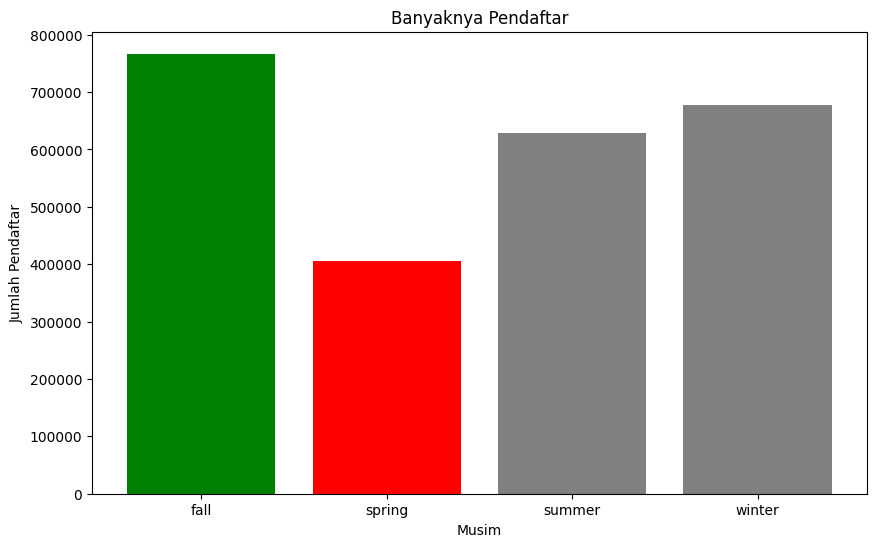

In [24]:
plt.figure(figsize=(10,6))
colors = ['green' if val == registered_season['registered'].max() 
          else 'red' if val == registered_season['registered'].min() 
          else 'gray' for val in registered_season['registered']]
plt.bar(registered_season['season'], registered_season['registered'], color=colors)
plt.title('Banyaknya Pendaftar')
plt.xlabel('Musim')
plt.ylabel('Jumlah Pendaftar')
plt.show()


In [ ]:
#Musim berdasarkan angka

#1 : Spring

#2 : Summer

#3 : Fall

#4 : Winter

### Pertanyaan 2: Jam berapa peminjam meminjam sepeda dan jumlah peminjamnya berapa ?

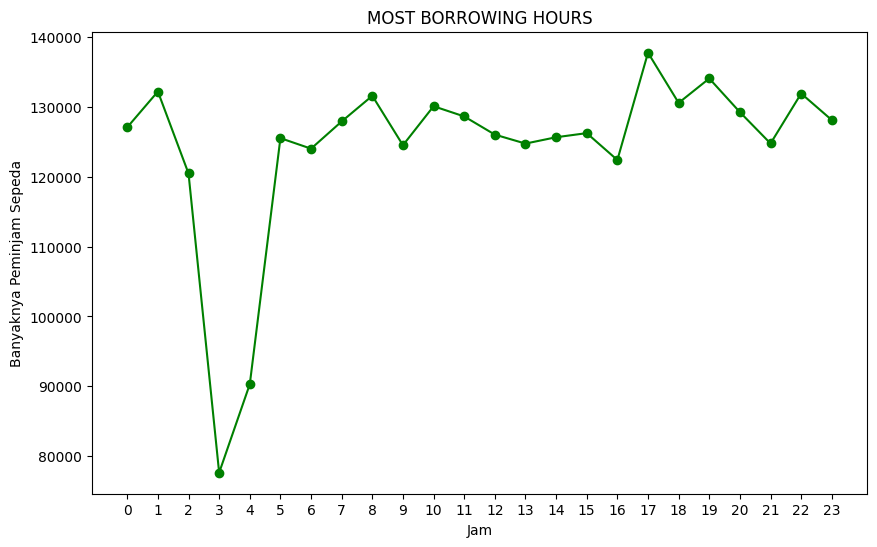

In [25]:
plt.figure(figsize=(10,6))
plt.plot(borrowers_by_time.index, borrowers_by_time.values, color='green', marker='o')
plt.title('MOST BORROWING HOURS')
plt.xlabel('Jam')
plt.ylabel('Banyaknya Peminjam Sepeda')
plt.xticks(borrowers_by_time.index)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Jadi paling banyak pendaftar mendaftar pada musim gugur(fall) sebanyak 766711 dan yang paling sedikit pada musim semi(spring) sebanyak 406045 pendaftar.
- conclution pertanyaan 2 : Kebanyakan orang meminjam sepeda di jam 12 malam - 1 pagi dan mulai jam 5 pagi sampe 11 malam.

In [26]:
df.to_csv("all_data.csv", index=False)